In [1]:
import pandas as pd
import numpy as np
import os
import pickle

In [28]:
gene_disease = pd.read_csv("./data/gene_disease_relation.csv", dtype=object)
gene_disease_ent = pd.concat([gene_disease[['node1', 'node1_type']].rename(columns={'node1':'id', 'node1_type':'type'}),
                              gene_disease[['node2', 'node2_type']].rename(columns={'node2':'id', 'node2_type':'type'})], axis=0)
gene_disease_ent = gene_disease_ent.drop_duplicates()
disease_ent = gene_disease_ent[gene_disease_ent['type']=='Disease']
disease_ent

,id,type
0,DOID:0001816,Disease
433,DOID:0002116,Disease
760,DOID:0014667,Disease
3991,DOID:0040083,Disease
4146,DOID:0040084,Disease
...,...,...
2313366,MESH:C566895,Disease
2323023,MESH:D000031,Disease
2326315,DOID:2744,Disease
2326823,MONDO:0012931,Disease


In [41]:
disease_feat1 = pd.read_csv("./data/disease_feature.csv", dtype=object)
disease_feat1 = disease_feat1.dropna(subset='def')
disease_feat2 = pd.read_csv("./data/disease_feature_update.csv", dtype=object)
disease_feat2 = disease_feat2.dropna(subset='def')
print(len(disease_ent), len(disease_feat1), len(disease_feat2))
pd.merge(disease_ent, disease_feat2, on='id', how='inner')

12253 18002 20979


,id,type,index,kind,name,def,null_def,synonym,source
0,DOID:0001816,Disease,1,Disease,angiosarcoma,A vascular cancer that derives_from the cells ...,0,hemangiosarcoma,DO
1,DOID:0002116,Disease,2,Disease,pterygium,A corneal disease that is characterized by a t...,0,surfer's eye,DO
2,DOID:0014667,Disease,3,Disease,disease of metabolism,A disease that involving errors in metabolic p...,0,metabolic disease,DO
3,DOID:0040083,Disease,85,Disease,Chlamydia pneumonia,A bacterial pneumonia has_material_basis_in Ch...,0,NaN,DO
4,DOID:0040084,Disease,86,Disease,Streptococcus pneumonia,A bacterial pneumonia has_material_basis_in St...,0,NaN,DO
...,...,...,...,...,...,...,...,...,...
12248,MESH:C566895,Disease,12362,Disease,"Gangliosidosis, Generalized GM1, Type I, with ...",A lysosomal storage disorder causing progressi...,1,NaN,MESH
12249,MESH:D000031,Disease,12483,Disease,"Abortion, Septic","Any type of abortion, induced or spontaneous, ...",0,"Septic Abortion|Abortions, Septic|Septic Abort...",MESH
12250,DOID:2744,Disease,8043,Disease,pyelitis,An infection of the renal pelvis causing infla...,1,NaN,DO
12251,MONDO:0012931,Disease,18128,Disease,"focal segmental glomerulosclerosis 4, suscepti...",Any focal segmental glomerulosclerosis in whic...,0,APOL1 focal segmental glomerulosclerosis|focal...,MONDO


In [3]:
whole_kg = pd.read_csv("./data/whole_kg.csv", dtype=object)
whole_kg

test = whole_kg.copy(deep=True)
# test.insert(0, 'entityid_pair', test['node1_index'] + ':' + test['node2_index'])
test.insert(0, 'rgroup', test['node1_type'] + ':' + test['node2_type'] + '::' + test['relation'])
test.insert(1, 'entity_pair', test['node1_type'] + ':' + test['node2_type'])
test_dg = test[test['entity_pair'].isin(['Disease:Gene', 'Gene:Disease'])]#.iloc[:,:2]
test_dg

,rgroup,entity_pair,index,node1,node1_type,relation,node2,node2_type,direction
0,Disease:Disease::is a,Disease:Disease,1,DOID:0001816,Disease,is a,DOID:175,Disease,1
1,Disease:Disease::is a,Disease:Disease,2,DOID:0001816,Disease,is a,MESH:D009383,Disease,1
2,Disease:Disease::is a,Disease:Disease,3,DOID:0001816,Disease,is a,MESH:D012509,Disease,1
3,Disease:Disease::is a,Disease:Disease,4,DOID:0001816,Disease,is a,MONDO:0018078,Disease,1
4,Disease:Disease::is a,Disease:Disease,5,DOID:0002116,Disease,is a,DOID:10124,Disease,1
...,...,...,...,...,...,...,...,...,...
23279704,TCM_Symptom:TCM_Syndrome::associated with,TCM_Symptom:TCM_Syndrome,23279705,TCM_Symptom998,TCM_Symptom,associated with,TCM_Syndrome141,TCM_Syndrome,0
23279705,TCM_Symptom:TCM_Syndrome::associated with,TCM_Symptom:TCM_Syndrome,23279706,TCM_Symptom998,TCM_Symptom,associated with,TCM_Syndrome177,TCM_Syndrome,0
23279706,TCM_Symptom:TCM_Syndrome::associated with,TCM_Symptom:TCM_Syndrome,23279707,TCM_Symptom998,TCM_Symptom,associated with,TCM_Syndrome182,TCM_Syndrome,0
23279707,TCM_Symptom:TCM_Syndrome::associated with,TCM_Symptom:TCM_Syndrome,23279708,TCM_Symptom999,TCM_Symptom,associated with,TCM_Syndrome124,TCM_Syndrome,0


In [15]:
gene_list = ['Q9NXS2', 'Q16769', 'O95630'] #, 'Q92905', 'P14902', 'P48775'
disease_list = ['DOID:8577', 'DOID:784'] #, 'DOID:10652', 'DOID:14330', 'MESH:D009369'

test_dg[(test_dg['node1'].isin(gene_list)) & (test_dg['node2'].isin(disease_list)) |
        (test_dg['node1'].isin(disease_list)) & (test_dg['node2'].isin(gene_list))]

,rgroup,entity_pair,node1,node1_type,relation,node2,node2_type,direction


### BioBert-finetuned

In [16]:
disease_feature = pd.read_csv('../data/data/disease_feature.csv')
print(len(disease_feature))
disease_feature[pd.isnull(disease_feature['def'])]#.drop_duplicates('source')

27090


,index,id,kind,name,def,synonym,source
5837,5974,DOID:10139,Disease,conjunctival degeneration,NaN,NaN,DO
5848,5985,DOID:10174,Disease,lacrimal passage granuloma,NaN,Granuloma of lacrimal passages,DO
5851,5988,DOID:10177,Disease,malignant hypertensive renal disease,NaN,NaN,DO
5871,6008,DOID:10211,Disease,cholelithiasis,NaN,NaN,DO
5875,6012,DOID:10230,Disease,aortic atherosclerosis,NaN,Atherosclerosis of aorta,DO
...,...,...,...,...,...,...,...
26756,26935,MONDO:0957545,Disease,"cardiomyopathy, dilated, 2I",NaN,NaN,MONDO
26757,26936,MONDO:0957556,Disease,congenital pulmonary vein atresia,NaN,NaN,MONDO
27085,27264,MONDO:8000012,Disease,"neurologic, endocrine, and pancreatic disease,...",NaN,"IMNEPD|infantile-onset multisystem neurologic,...",MONDO
27086,27265,MONDO:8000013,Disease,"portal hypertension, noncirrhotic, 1",NaN,"NCPH|portal hypertension, noncirrhotic; NCPH",MONDO


In [20]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, Trainer, TrainingArguments
from datasets import Dataset
import torch

# 1. 加载数据集
# file_path = 'disease_feature.csv'  # 替换为实际文件路径
data = disease_feature.copy(deep=True)

# 2. 数据预处理
# 保留有定义的数据用于训练
data = data.dropna(subset=['def'])
train_data = data[['name', 'def']].rename(columns={'name': 'question', 'def': 'context'})
train_data = train_data.sample(frac=0.01, random_state=42)  # 随机抽取10%的数据用于训练

# 构建Hugging Face的数据集对象
dataset = Dataset.from_pandas(train_data)

# 划分训练和测试集
split_dataset = dataset.train_test_split(test_size=0.2)

a = split_dataset['train']['__index_level_0__']#['question']
print(a)
print(type(a))

[25237, 1983, 6654, 14100, 13361, 5897, 1453, 20637, 21905, 23618, 22747, 19465, 6960, 13740, 9675, 15388, 14707, 13448, 1321, 970, 5954, 14449, 15042, 8506, 9487, 14234, 4304, 2583, 14438, 13266, 5069, 23961, 26137, 23414, 3698, 25008, 13866, 2718, 9181, 4972, 5118, 4165, 5174, 6762, 16196, 7548, 12732, 20022, 10863, 13416, 26767, 4918, 6663, 11217, 10609, 9638, 6099, 22066, 15351, 12720, 14636, 22668, 13236, 21478, 20899, 14003, 8196, 19305, 23399, 13182, 12779, 20015, 4771, 2579, 13708, 3210, 22698, 3120, 21155, 13191, 4449, 16782, 19897, 17777, 17229, 3013, 21545, 8192, 15755, 4767, 24578, 4848, 13745, 5157, 14518, 16445, 9111, 2420, 6062, 13704, 16244, 18300, 1328, 13649, 25697, 10951, 15304, 8335, 17122, 13126, 5701, 2714, 26045, 22862, 10311, 1144, 22298, 12752, 980, 13117, 12767, 8914, 13991, 651, 13904, 6324, 4625, 1086, 2498, 16618, 10183, 22555, 3073, 10308, 24762, 2177, 23833, 2425, 25842, 10391, 828, 3314, 21628, 5071]
<class 'list'>


In [25]:
# 3. 加载BioBERT模型和分词器
DIS_MODEL = "/home/worker/users/ZC/KnowledgeGraph/TarKG_reason/model/huggingface/dmis-lab/biobert-base-cased-v1.2"
tokenizer = AutoTokenizer.from_pretrained(DIS_MODEL)
model = AutoModelForQuestionAnswering.from_pretrained(DIS_MODEL)

# 数据预处理函数
def preprocess_function(examples):
    inputs = tokenizer(
        examples["question"],
        examples["context"],
        max_length=512,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    inputs["start_positions"] = torch.tensor([0] * len(inputs["input_ids"]))  # 假设起点位置
    inputs["end_positions"] = torch.tensor([0] * len(inputs["input_ids"]))  # 假设终点位置
    return inputs

# 应用预处理到数据集
tokenized_datasets = split_dataset.map(preprocess_function, batched=True)

# 4. 定义训练参数
out_dir = "./biobert-finetuned/"
training_args = TrainingArguments(
    output_dir=out_dir+"results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    logging_dir=out_dir+"logs"
)

# 定义Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer
)

# 微调模型
trainer.train()

Some weights of the model checkpoint at /home/worker/users/ZC/KnowledgeGraph/TarKG_reason/model/huggingface/dmis-lab/biobert-base-cased-v1.2 were not used when initializing BertForQuestionAnswering: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification mod

Map:   0%|          | 0/144 [00:00<?, ? examples/s]

Map:   0%|          | 0/37 [00:00<?, ? examples/s]

ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.20.1`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [ ]:
# 5. 用微调后的模型生成定义
def generate_definition(model, tokenizer, disease_name):
    question = f"{disease_name}"
    context = ""  # 如果有额外上下文可以填入
    inputs = tokenizer.encode_plus(question, context, return_tensors="pt", max_length=512, truncation=True)
    outputs = model(**inputs)
    start_index = torch.argmax(outputs.start_logits)
    end_index = torch.argmax(outputs.end_logits)
    answer_tokens = inputs["input_ids"][0][start_index:end_index + 1]
    answer = tokenizer.decode(answer_tokens, skip_special_tokens=True)
    return answer

# 示例生成
disease_name = "example_disease"
generated_definition = generate_definition(model, tokenizer, disease_name)
print(f"Generated definition for {disease_name}: {generated_definition}")

## Protein Features

In [1]:
import os
import re
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
import pickle
import json

# import pudb
import argparse

from transformers import BertModel, BertTokenizer
from transformers import AutoTokenizer, EsmModel

prot_models = ["Rostlab/prot_bert", "yarongef/DistilProtBert", "facebook/esm2_t33_650M_UR50D"]
model_choice = 2
PROT_MODEL = prot_models[model_choice]
PROT_MODEL = "/home/worker/users/ZC/KnowledgeGraph/TarKG_reason/model/huggingface/facebook/esm2_t33_650M_UR50D"

model_names = ["ProtBERT", "DistilProtBERT", "ESM-2"]
model_name = model_names[model_choice]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

if model_choice == 2:
    prot_tokenizer = AutoTokenizer.from_pretrained(PROT_MODEL, do_lower_case=False) #, local_files_only=True
    prot_model = EsmModel.from_pretrained(PROT_MODEL)
else:
    prot_tokenizer = BertTokenizer.from_pretrained(PROT_MODEL, do_lower_case=False) #, local_files_only=True
    prot_model = BertModel.from_pretrained(PROT_MODEL)
prot_model.to(device)

BATCH_SIZE = 32 # 256
MAX_PROT_LEN = 1800

raw_path = "./data_demo"
save_dir = "./dataset/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

def preprocess_protein(sequence):
    processProtein = [aa for aa in sequence] # aa is a single amino acid
    processProtein = " ".join(processProtein)
    processProtein = re.sub(r"[UZOB]", "X", processProtein)
    return processProtein

gene_data = pd.read_csv(os.path.join(raw_path, "gene_feature.csv"))
gene_data = gene_data[['index', 'sequence']]
gene_data['index'] = gene_data['index'].astype(int) - 1
gene_data['sequence'] = gene_data['sequence'].apply(preprocess_protein)

print("Extracting protein embeddings for train set")
train_batches = [(gene_data['index'].tolist()[i:i+BATCH_SIZE], gene_data['sequence'].tolist()[i:i+BATCH_SIZE])
                 for i in range(0, len(gene_data), BATCH_SIZE)]
print(f" Total batches: {len(train_batches)}")

Some weights of the model checkpoint at /home/worker/users/ZC/KnowledgeGraph/TarKG_reason/model/huggingface/facebook/esm2_t33_650M_UR50D were not used when initializing EsmModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing EsmModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EsmModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of EsmModel were not initialized from the model checkpoint at /home/worker/users/ZC/KnowledgeGraph/TarKG_reason/model/huggingface/facebook/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']

Extracting protein embeddings for train set
 Total batches: 2033


In [2]:
protein_emb_train = {}
for batch_indices, train_batch in tqdm(train_batches[:20]):
    encoded_proteins = prot_tokenizer(train_batch, 
                                  return_tensors='pt', 
                                  max_length=MAX_PROT_LEN, 
                                  truncation=True, 
                                  padding=True)
    
    encoded_proteins = encoded_proteins.to(device)
    with torch.no_grad():
        train_target_embeddings = prot_model(**encoded_proteins).last_hidden_state[:, 0, :]
    for index, embedding in zip(batch_indices, train_target_embeddings.cpu().detach().numpy()):
        protein_emb_train[index] = embedding
    torch.cuda.empty_cache()

100%|██████████| 20/20 [01:23<00:00,  4.16s/it]


In [6]:
PATH = os.path.join(save_dir, "temp.pkl")
with open(PATH, 'wb') as f:
    pickle.dump(protein_emb_train, f)

with open(PATH, 'rb') as f:
    protein_emb_train_read = pickle.load(f)
protein_emb_train_read

{111846: array([ 0.0406392 ,  0.02125084,  0.07059984, ..., -0.24208853,
         0.1844297 ,  0.00756793], dtype=float32),
 111847: array([ 0.03871218, -0.030468  ,  0.04719653, ..., -0.29315308,
         0.16129938,  0.06490628], dtype=float32),
 111848: array([ 0.0184457 ,  0.04433786,  0.07402325, ..., -0.23156245,
         0.19155923,  0.03464252], dtype=float32),
 111849: array([ 0.01911066,  0.03212463,  0.05646409, ..., -0.25210312,
         0.17968637,  0.04401902], dtype=float32),
 111850: array([ 0.03310029, -0.04506623,  0.05685562, ..., -0.28138152,
         0.16237497,  0.01513143], dtype=float32),
 111851: array([ 5.7730414e-02,  2.8858896e-05,  7.6281980e-02, ...,
        -2.3910066e-01,  1.5005931e-01,  5.7274967e-02], dtype=float32),
 111852: array([-0.00439946,  0.01409343,  0.0869699 , ..., -0.3416561 ,
         0.1722925 ,  0.01156958], dtype=float32),
 111853: array([ 0.04115744,  0.02154849,  0.11048338, ..., -0.23076738,
         0.13211443, -0.0362256 ], dtype=

count    65046.000000
mean       574.613535
std        621.860494
min          5.000000
25%        271.000000
50%        431.000000
75%        689.000000
max      35991.000000
dtype: float64
63040


<AxesSubplot:ylabel='Frequency'>

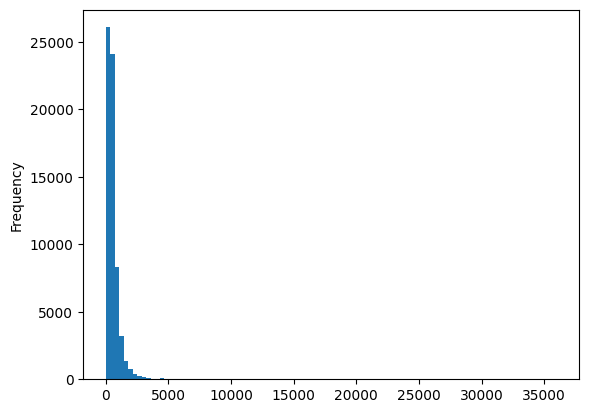

In [5]:
a= pd.Series([len(s.replace(" ", "")) for s in gene_data['sequence'].tolist()])
print(a.describe())
print(a[a<1800].count())
a.plot(kind='hist', bins=100)

## Disease Feature 

In [3]:
import os
import re
import pandas as pd
import numpy as np
import torch
import pickle
import json

from transformers import AutoTokenizer, AutoModel

# 加载BioBERT模型和分词器
DIS_MODEL = "/home/worker/users/ZC/KnowledgeGraph/TarKG_reason/model/huggingface/dmis-lab/biobert-base-cased-v1.2"
tokenizer = AutoTokenizer.from_pretrained(DIS_MODEL)
model = AutoModel.from_pretrained(DIS_MODEL)

raw_path = "./data_demo"
save_dir = "./dataset/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

def encode_disease_features(name, definition):
    # 将疾病名称和定义拼接为一个完整的输入句子
    input_text = f"Disease: {name}. Definition: {definition}"
    inputs = tokenizer(input_text, return_tensors="pt")
    
    # 获取BioBERT输出
    outputs = model(**inputs)
    last_hidden_state = outputs.last_hidden_state  # [batch_size, seq_len, hidden_dim]
    
    # 进行池化操作（平均池化）
    disease_embedding = torch.mean(last_hidden_state, dim=1).squeeze()
    return disease_embedding

# 读取疾病数据
disease_data = pd.read_csv(os.path.join(raw_path, "disease_feature.csv"))
disease_data['index'] = disease_data['index'].astype(int) - 1
disease_data = disease_data.iloc[:6, :]
disease_data

Some weights of the model checkpoint at /home/worker/users/ZC/KnowledgeGraph/TarKG_reason/model/huggingface/dmis-lab/biobert-base-cased-v1.2 were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,index,id,kind,name,def,synonym,source
0,100809,DOID:0001816,Disease,angiosarcoma,A vascular cancer that derives_from the cells ...,hemangiosarcoma,DO
1,100810,DOID:0002116,Disease,pterygium,A corneal disease that is characterized by a t...,surfer's eye,DO
2,100811,DOID:0014667,Disease,disease of metabolism,A disease that involving errors in metabolic p...,metabolic disease,DO
3,100812,DOID:0040001,Disease,shrimp allergy,A crustacean allergy that has_allergic_trigger...,NaN,DO
4,100813,DOID:0040002,Disease,aspirin allergy,A drug allergy that has_allergic_trigger acety...,acetylsalicylic acid allergy|ASA allergy,DO
5,100814,DOID:0040003,Disease,benzylpenicillin allergy,A beta-lactam allergy that has_allergic_trigge...,benzyl penicillin allergy|penicillin G allergy,DO


In [4]:
# 对每条疾病记录进行编码
disease_embeddings = {}
for _, row in disease_data.iterrows():
    name = row['name']
    definition = row['def'] if pd.notna(row['def']) else "This disease currently lacks a specific definition."
    embedding = encode_disease_features(name, definition)
    disease_embeddings[row['index']] = embedding.detach().numpy()
disease_embeddings

{100809: array([ 1.83413383e-02,  9.19707790e-02, -2.66987056e-01, -1.21435123e-02,
         1.85398117e-01,  1.46856859e-01,  3.44830900e-02,  6.22515678e-02,
         7.72415996e-02, -3.55466828e-02,  3.16770226e-02,  1.94850475e-01,
        -1.22663468e-01,  1.97902650e-01, -4.85066235e-01, -1.69124618e-01,
        -8.57427716e-02, -3.73259038e-02,  1.58578321e-01,  1.03845574e-01,
        -2.36788914e-01,  5.94320856e-02, -1.55459315e-01,  6.42099679e-02,
        -2.71434337e-01, -1.64710581e-01, -2.54582521e-02,  5.19247234e-01,
         2.49285605e-02,  2.37342864e-01,  1.02694176e-01, -6.59677014e-02,
        -7.20299333e-02,  2.43391514e-01,  1.73352122e-01,  1.12009883e-01,
         7.24436119e-02,  2.90127903e-01,  1.25737548e-01, -7.27882981e-02,
         1.35162398e-01, -6.29975051e-02,  2.15452313e-01, -5.45250960e-02,
         1.80064142e-01, -7.82061443e-02, -3.78532745e-02, -2.27588758e-01,
        -1.51447698e-01,  8.84420574e-02,  9.34456661e-02, -4.60884273e-02,
    